In [ ]:
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np
import json

In [28]:
string_to_output = "cheeky letters"

In [29]:
set_of_appropriate_font_files = set([".ttf", ".otf"])

In [30]:
def gather_font_files(current_path: str, list_of_font_file_paths: list):
    if os.path.isdir(current_path):
        for item in os.listdir(current_path):
            new_path = os.path.join(current_path, item)
            gather_font_files(new_path, list_of_font_file_paths)
    else:
        ext = os.path.splitext(os.path.basename(current_path))[-1]
        if ext in set_of_appropriate_font_files:
            list_of_font_file_paths.append(current_path)

In [38]:
def keep_track_of_which_fonts_are_wanted(font_dictionary_tracker: dict, font_path: str):
    use_font = input("If this font is to be used type: \'y\' else type: \'n\'. To quit type \'q\' --: ")

    if use_font == 'y':
        weight = input("Less: \'1\', Normal: \'2\', More: \'3\' --: ")
        valid_options = set(["1", "2", "3"])
        while weight not in valid_options:
            print("invalid options, try again.")
            weight = input("Less: \'1\', Normal: \'2\', More: \'3\' --: ")

        weight_as_int = int(weight)

        font_dictionary_tracker[font_path] = weight_as_int

    return use_font

In [39]:
def write_out_dictionary(dictionary: dict, output_path: str):
    with open(output_path, 'w') as json_out:
        json.dump(dictionary, json_out)

In [40]:
def load_existing_dictionary(output_path_to_fonts_and_weights: str):
    with open(output_path_to_fonts_and_weights, 'r') as json_in:
        font_dictionary_tracker = json.load(json_in)
    return font_dictionary_tracker

In [41]:
def view_fonts_and_determine_use(font_paths: list, output_path_to_fonts_and_weights: str, use_existing_dict_in_output: bool):
    if use_existing_dict_in_output:
        font_dictionary_tracker = load_existing_dictionary(output_path_to_fonts_and_weights)
    else:
        font_dictionary_tracker = {}

    background_color = 100
    font_size = 240
    font_color = 0

    for index_in_font_paths, font_path in enumerate(font_paths):
        if font_path not in font_dictionary_tracker:
            font_object = ImageFont.truetype(font_path, font_size)
            temp_image = Image.new('RGB', (1, 1), color=(background_color, background_color, background_color))
            temp_draw = ImageDraw.Draw(temp_image)
            text_bbox = temp_draw.textbbox((0, 0), string_to_output, font=font_object)
            image_width = 5*(text_bbox[2] - text_bbox[0])
            image_height = 5*(text_bbox[3] - text_bbox[1])
            image = Image.new('RGB', (image_width+5, image_height+5), color=(background_color, background_color, background_color))
            text_width = image_width
            text_height = image_height
            text_start_y = round(text_height*0.2)
            text_start_x = round(text_width*0.2)
            draw = ImageDraw.Draw(image)
            draw.text((text_start_x, text_start_y), string_to_output, font=font_object, fill=(font_color, font_color, font_color))
            image_as_array = np.array(image)
            top_of_text = 0
            bottom_of_text = image_height-1
            left_of_text = 0
            right_of_text = image_width-1

            height, width = image_as_array.shape[:2]

            for i in range(height):
                row = image_as_array[i, :, :]
                if np.any(row == font_color):
                    top_of_text = i
                    break

            for i in range((height-1), -1, -1):
                row = image_as_array[i, :, :]
                if np.any(row == font_color):
                    bottom_of_text = i
                    break

            for i in range(width):
                column = image_as_array[:, i, :]
                if np.any(column == font_color):
                    left_of_text = i
                    break

            for i in range((width-1), -1, -1):
                column = image_as_array[:, i, :]
                if np.any(column == font_color):
                    right_of_text = i
                    break

            if top_of_text > 0:
                top_of_text -= 1
            if bottom_of_text < image_height-1:
                bottom_of_text += 1
            if left_of_text > 0:
                left_of_text -= 1
            if right_of_text < image_width-1:
                right_of_text += 1

            array_of_interest = image_as_array[top_of_text:bottom_of_text, left_of_text:right_of_text, :]
            image = Image.fromarray(array_of_interest)

            plt.imshow(image)
            plt.axis("off")
            plt.show()

            result = keep_track_of_which_fonts_are_wanted(font_dictionary_tracker, font_path)

            if index_in_font_paths % 10 == 0:
                write_out_dictionary(font_dictionary_tracker, output_path_to_fonts_and_weights)

            if result == "q":
                break

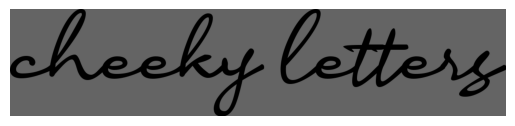

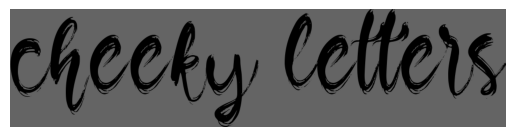

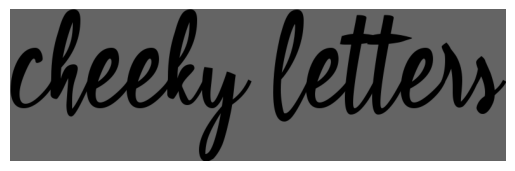

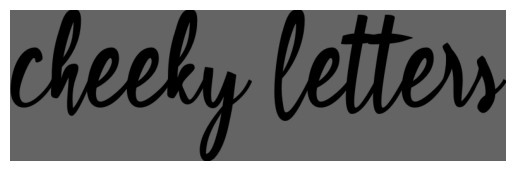

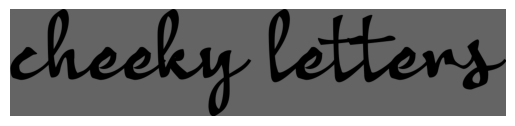

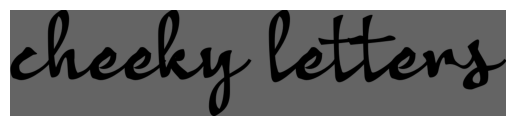

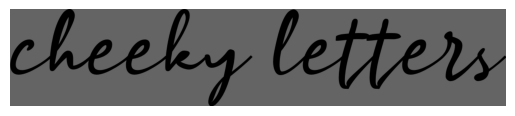

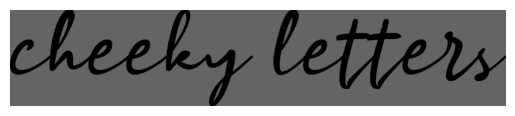

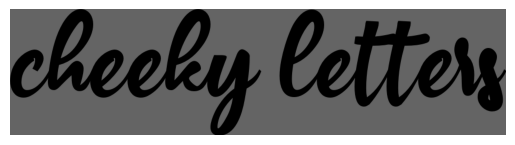

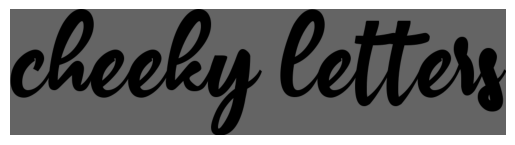

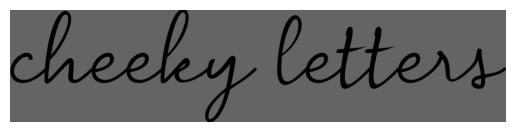

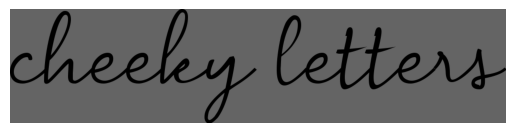

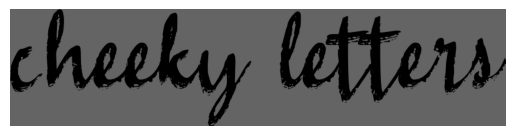

In [43]:
path_to_root_directory_for_fonts = r"C:\Users\Jackson Roubidoux\RLL\repos\data_generator\handwriting_data_generator\fonts"
path_to_output_json_for_fonts_and_weights = r"C:\Users\Jackson Roubidoux\RLL\repos\data_generator\sandbox\fonts_and_weights\temp.json"
font_paths = []
gather_font_files(path_to_root_directory_for_fonts, font_paths)
view_fonts_and_determine_use(font_paths, path_to_output_json_for_fonts_and_weights, True)
